<a href="https://colab.research.google.com/github/sathwika2005/ML_Project/blob/main/TV_Show_Data_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
Summary               8
Average Runtime      10
End Date              4
Premiere Date       249
Network             111
Rating              786
Schedule (time)     345
Character Names     343
Person Names        343
Official Site      1216
dtype: int64


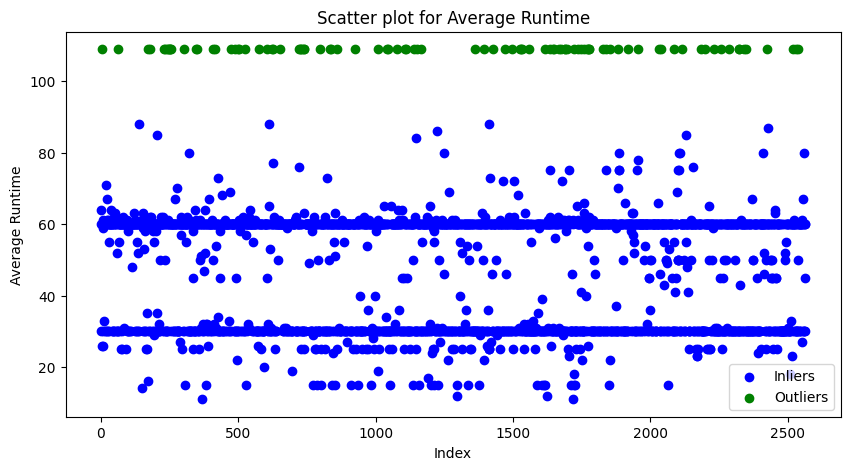

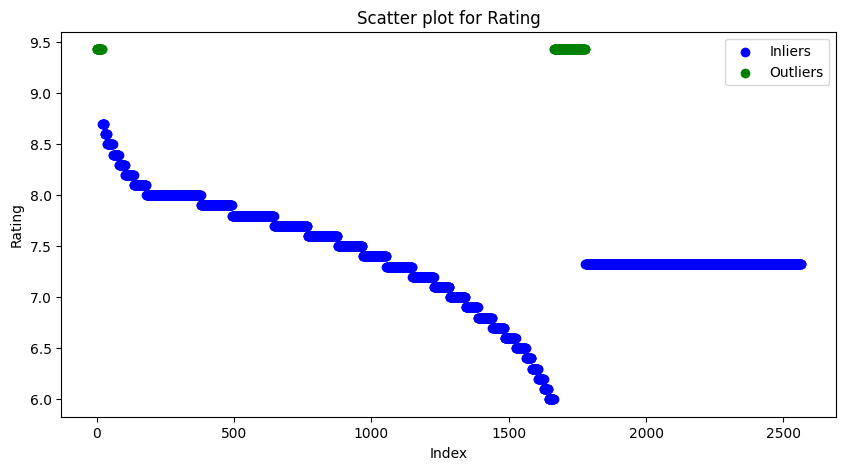

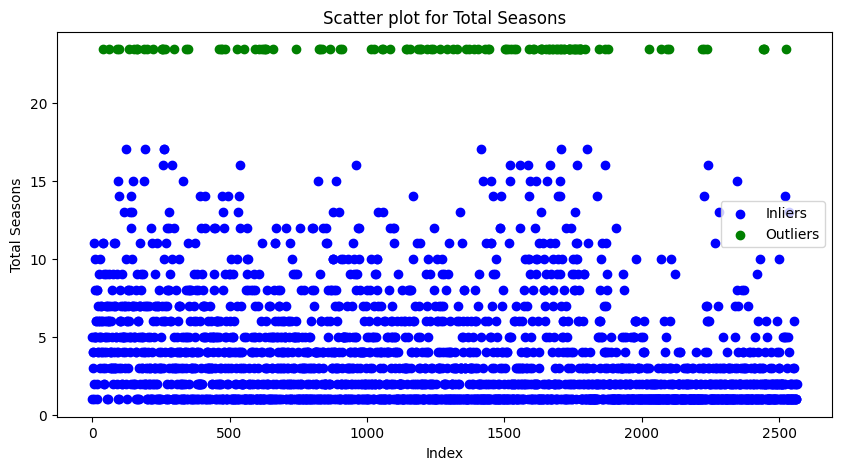

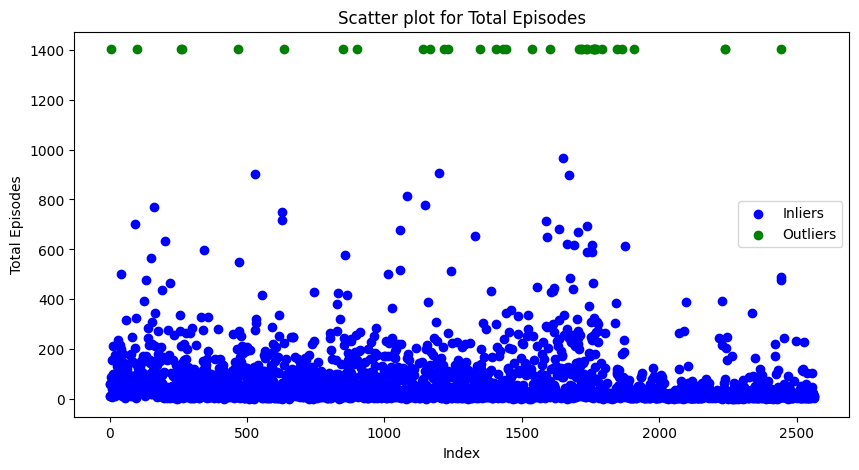

Initial number of rows: 2565
Final number of rows after removing outliers: 2192
The number of columns in the cleaned dataset is: 17


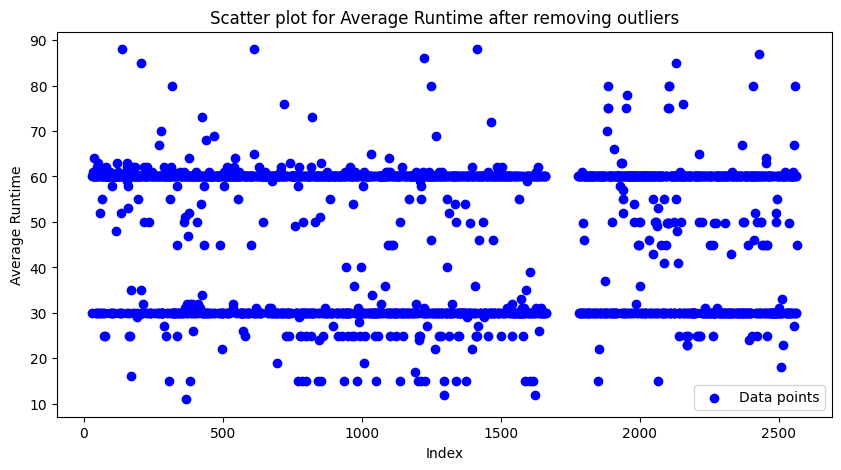

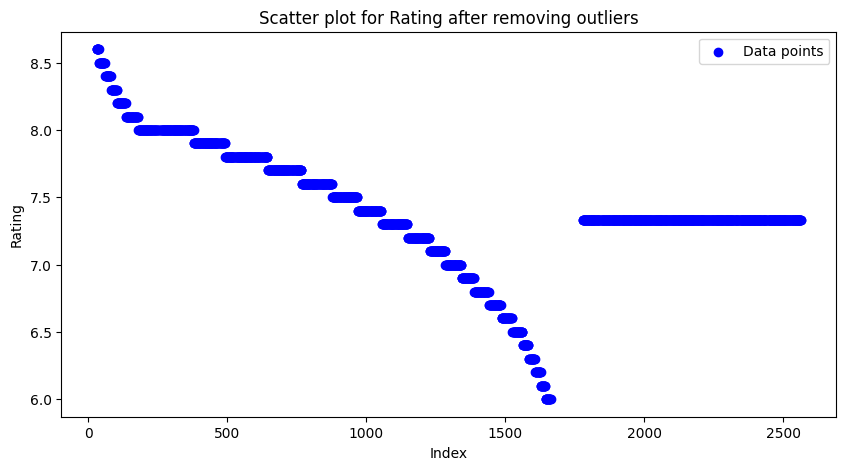

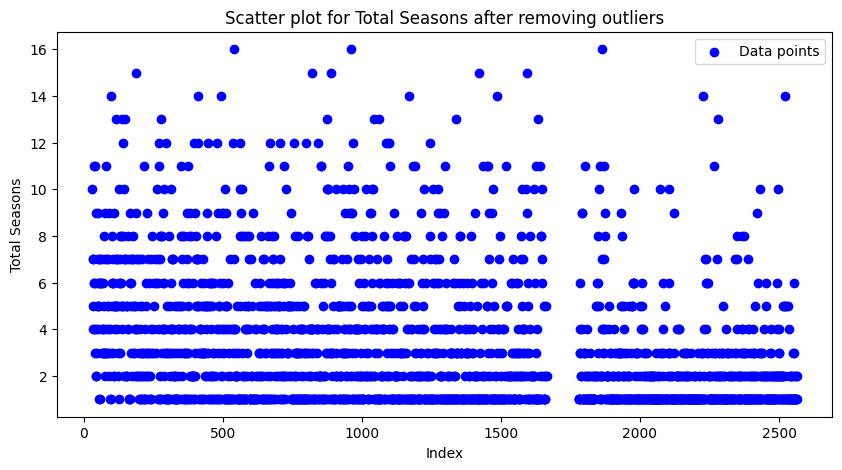

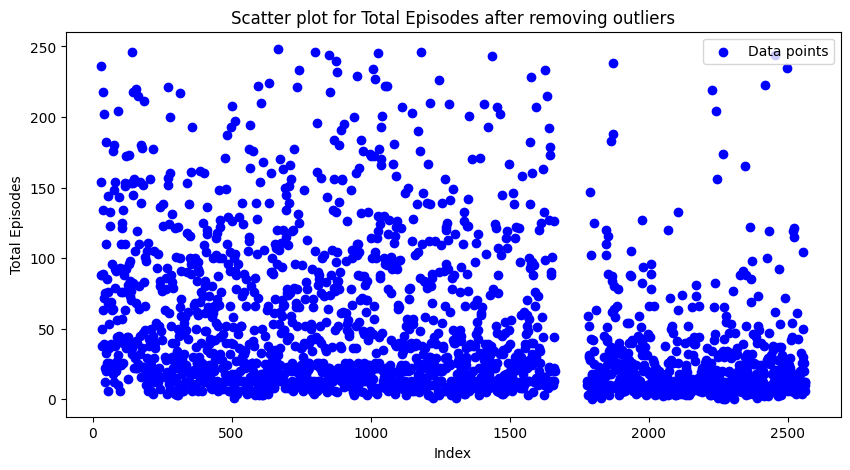

             Name                                            Summary  \
30        Friends  Six young (20-something) people from New York ...   
31  The West Wing  The entire White House staff bristles with act...   
32     The Shield  Detective Vic Mackey is the leader of an elite...   
33   Orphan Black  Orphan Black is about Sarah, an outsider and o...   
34        Banshee  Banshee stars Antony Starr as Lucas Hood, an e...   

    Average Runtime    End Date Premiere Date  \
30         0.246753  1994-09-22    2004-05-06   
31         0.636364  1999-09-22    2006-05-14   
32         0.649351  2002-03-12    2008-11-25   
33         0.636364  2013-03-30    2017-08-12   
34         0.636364  2013-01-11    2016-05-20   

                                      Genres      Type Language  \
30                     ['Comedy', 'Romance']  Scripted  English   
31                                 ['Drama']  Scripted  English   
32                        ['Drama', 'Crime']  Scripted  English   
33  

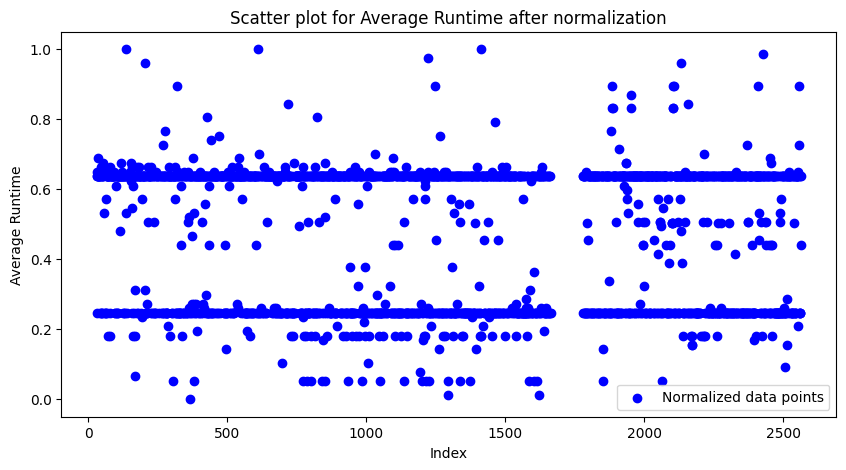

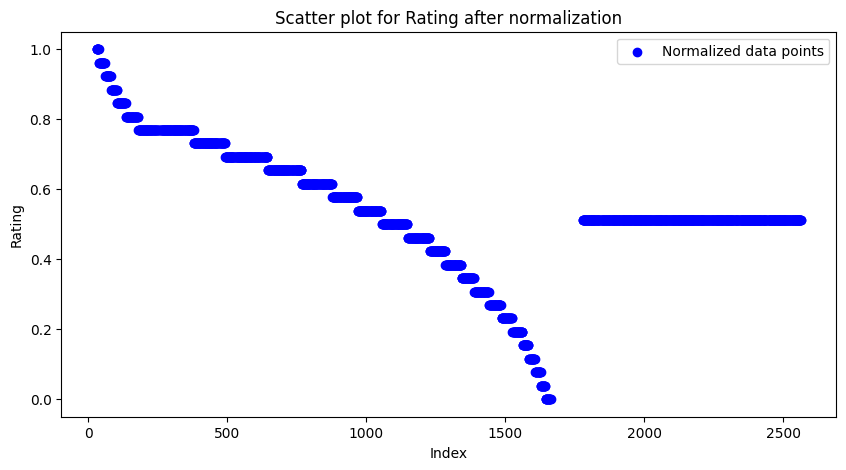

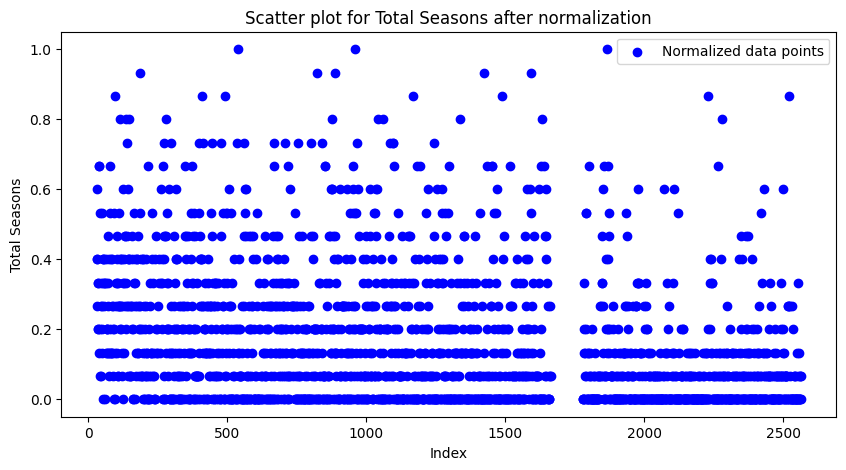

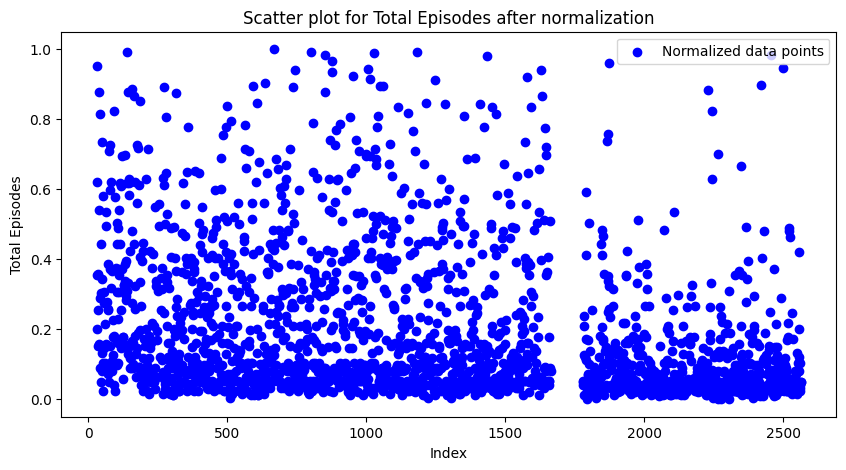

In [ ]:
  import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
file_path = 'data.csv'
tv_show_data = pd.read_csv(file_path)

# Handle missing values
missing_values = tv_show_data.isnull().sum()
print("Missing values:")
print(missing_values[missing_values > 0])

# Impute numeric columns with mean
numeric_cols = tv_show_data.select_dtypes(include=['number']).columns
tv_show_data[numeric_cols] = tv_show_data[numeric_cols].fillna(tv_show_data[numeric_cols].mean())

# Impute categorical columns with mode
non_numeric_cols = tv_show_data.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    tv_show_data[col].fillna(tv_show_data[col].mode()[0], inplace=True)

# Function to identify outliers based on mean and standard deviation
def identify_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    inliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return inliers, outliers, mean, std

# Columns to check for outliers
numeric_columns = ["Average Runtime", "Rating", "Total Seasons", "Total Episodes"]

# Initial number of rows
initial_rows = tv_show_data.shape[0]

# Plotting scatter plots for each column to identify and highlight outliers visually
for column in numeric_columns:
    data = tv_show_data[column].dropna()
    inliers, outliers, mean_value, std_value = identify_outliers(tv_show_data, column)

    plt.figure(figsize=(10, 5))
    plt.scatter(inliers.index, inliers[column], color='blue', label='Inliers')
    plt.scatter(outliers.index, [mean_value + 3 * std_value] * len(outliers), color='green', label='Outliers') # Move outliers to the top
    plt.title(f'Scatter plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Removing outliers for each specified column
for column in numeric_columns:
    _, outliers, _, _ = identify_outliers(tv_show_data, column)
    tv_show_data = tv_show_data.drop(outliers.index)

# Number of rows after removing outliers
final_rows = tv_show_data.shape[0]

# Print the number of columns and rows before and after removing outliers
print(f"Initial number of rows: {initial_rows}")
print(f"Final number of rows after removing outliers: {final_rows}")
print(f"The number of columns in the cleaned dataset is: {tv_show_data.shape[1]}")

# Plotting scatter plots again to verify outliers are removed
for column in numeric_columns:
    data = tv_show_data[column].dropna()
    plt.figure(figsize=(10, 5))
    plt.scatter(data.index, data, color='blue', label='Data points')
    plt.title(f'Scatter plot for {column} after removing outliers')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Normalizing the numeric columns
scaler = MinMaxScaler()
tv_show_data_normalized = tv_show_data.copy()
tv_show_data_normalized[numeric_columns] = scaler.fit_transform(tv_show_data[numeric_columns])

# Display the first few rows of the normalized data
print(tv_show_data_normalized.head())

# Plotting scatter plots to verify normalization
for column in numeric_columns:
    data = tv_show_data_normalized[column].dropna()
    plt.figure(figsize=(10, 5))
    plt.scatter(data.index, data, color='blue', label='Normalized data points')
    plt.title(f'Scatter plot for {column} after normalization')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()
